# **Resource:** 
[(PDF) Supervised learning methods for skin segmentation classification](https://www.researchgate.net/publication/341281794_Supervised_learning_methods_for_skin_segmentation_classification)

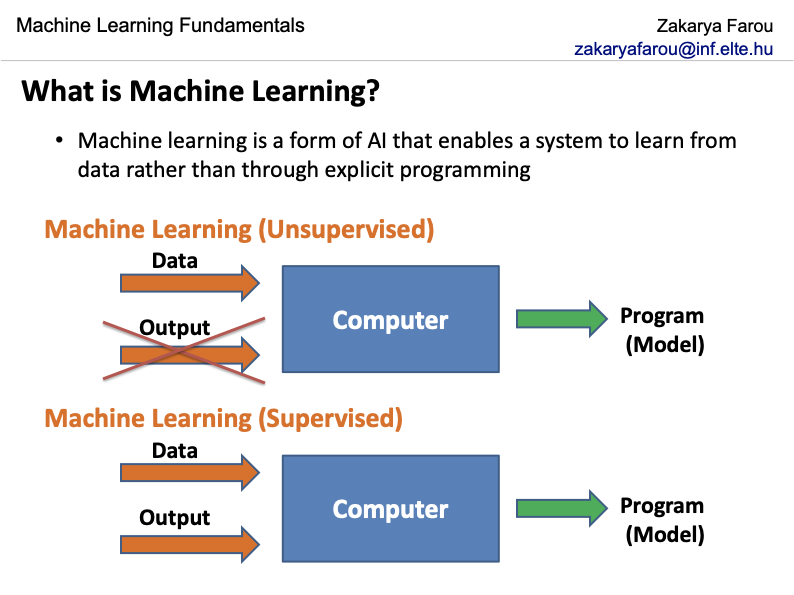

In **Unsupervised Learning**, an algorithm is provided with only the data. We do not know the output or the result of the data. The algorithm groups the data or make clusters of the data to make labels and when we provide data next time, it checks for the best cluster or group to which the input data should belong, to give the output. Clustering is the best example of unsupervised learning.

In **Supervised Learning**, an algorithm learns from a dataset. We give the data as well as the output corresponding to each input. 

The algorithm learns from the given data and next time if we enter the data, it will give the output in accordance with the given data. The data provided can be of two types:

- Discrete: In discrete data, we use classification. Classification is the process where incoming data is labeled based on past data samples and manually trains the algorithm to recognize certain types of objects and categorize them accordingly.
- Continuous: For continuous data, we use regression. Regression is the process of identifying patterns and calculating the predictions of continuous outcomes.

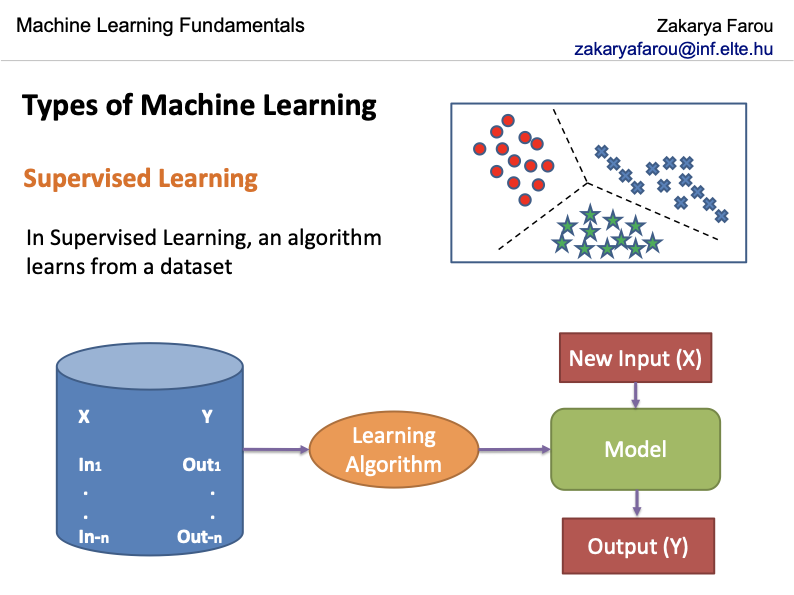

# Logistic Regression (LR): 
[Useful link](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8)

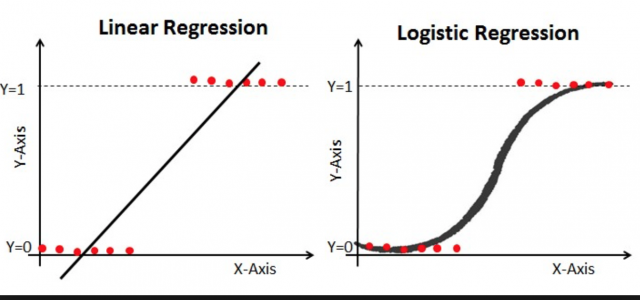

Logistic  Regression  (LR) is  mainly  used  for  binary  classification  problems,  LR  is  a  predictive analysis algorithm based on a linear regression model which uses a complex cost function. The cost function used for LR is called Sigmoid function 𝜎, which is known as the logistic function, hence the name of logistic regression. 𝜎	is used to map predicted values (class labels) to probabilities, it means that given any real number, applying the sigmoid function on it will give a new value between [0.. 1].

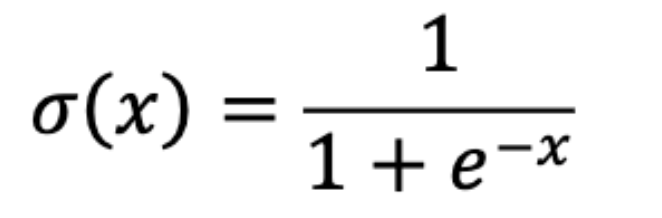
Such  a  classifier  uses  a  decision  boundary.  A  decision  boundary  in  case  of  LR  for  binary classification problems is a fixed threshold value. Based on the threshold value, LR algorithm gives a class label to the probabilities calculated with 𝜎. For Example, if we have 2 classes that has 0 and 1 as labels, a threshold 𝜑, and a new instance 𝑑, we give a class label 𝑦 to 𝑑 by using the following rules:

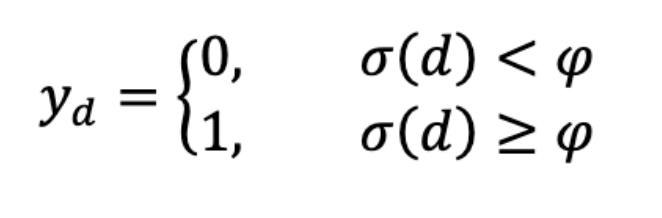

# K-nearest Neighbors (KNN): 
[useful link](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/)

K-nearest neighbors (KNN) is a lazy learning algorithm, which is often used for classification tasks. It is one of the easiest classification algorithms to understand. Despite its simplicity, it can still  deliver  very  competitive  results.  KNN  is  based on  similarity  measurements  between  dataset instances,  where K is  a  critical  hyper-parameter  for  this  algorithm,  indicating  how  many  nearest neighbors, we should consider for the classification of a new instance.   

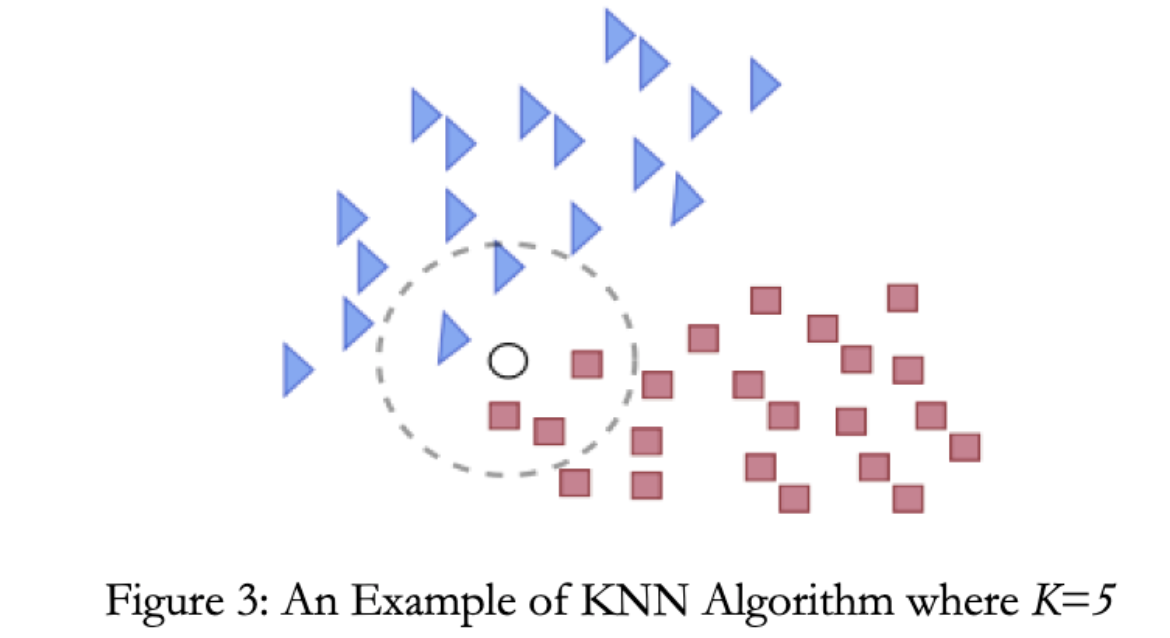

For  example,  if  we  have  two  classes: squares  and  triangles  (as  described  in  Figure  3)  and  we  fix K=5. With a new instance (circle) and based on the K parameter, the circle will be classified as a square  because  the  majority  of  its  neighbors  (in  this  case  3  of  5)  belong  to  the  same  class.  This means that the new instance is more likely to be a square than a triangle. 



# Classification (a practical example with the iris dataset)

Dataset [description](http://archive.ics.uci.edu/ml/datasets/Iris/)

##  Loading the Iris dataset using sklearn 

In [1]:
from sklearn import datasets

iris = datasets.load_iris()

## Let's split the data into train and test sets

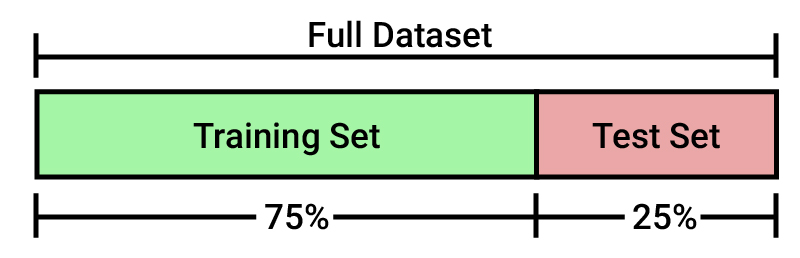

In [7]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## First we try the [K Nearest Neighbor classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

The single most important hyper parameter of this model is the K value of neighbors to consider when classifying a new object. Let's set it to 3 for now.


In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## After fitting the model we can print a report about the performance of our model using [Classificaton Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)



In [9]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.85      1.00      0.92        23
           2       1.00      0.83      0.90        23

    accuracy                           0.95        75
   macro avg       0.95      0.94      0.94        75
weighted avg       0.95      0.95      0.95        75



As we can see this problem was very easy, so we could achive 100 % precision on it.

## Let's load a bit more complicated dataset, the Breast Cancer dataset

In [11]:
breast_cancer = datasets.load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

## Split the data

In [16]:
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## After splitting the data we create a Logistic Regression model this time

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 100)
lr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



## Let's try KNN on this problem as well and see how it performs with K = 3.

In [20]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



## Optimizing the hyperparameters of our model (KNN)

Scikit Learn provides tools for this, one of the most commonly used is **Grid Search**. This is an exhaustive search implementation that will try out all the given possible parameters and see which performs the best.


In [21]:
from sklearn.model_selection import GridSearchCV


"""
n_neighbors: int, default = 5
    Number of neighbors to use by default for kneighbors queries.

p: int, default = 2
    When p = 1, this is equivalent to using manhattan_distance (l1), 
    and euclidean_distance (l2) for p = 2. 
    For arbitrary p, minkowski_distance (l_p) is used.
"""

hyper_params = {
                'n_neighbors': range(1,16),
                'p':range(1,5)
               }

grid = GridSearchCV(KNeighborsClassifier(), hyper_params)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 16), 'p': range(1, 5)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

### The best parameter settings are stored in the grid object's **best_params_** attribute

In [22]:
grid.best_params_

{'n_neighbors': 5, 'p': 1}

In [23]:
knn_model = KNeighborsClassifier(n_neighbors = grid.best_params_['n_neighbors'], p = grid.best_params_['p'])
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.95      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

